This notebook contains some tools for building your own graphs to play around. 
Good chunks of it were taken from Simon's
Some of these graphs take quite a bit of time render (the genre-by-person graphs took about 4 minutes each).


In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting
import numpy as np
from scipy import stats
from scipy import signal
from numpy import polyfit
import pandas
import pathlib
import seaborn
seaborn.set_style('whitegrid', {'axes.grid' : False})
import matplotlib
import matplotlib.pyplot as plt
import os
import re

# constants
MAX_TIME_POINTS = 2700

# plot settings
font = {'family' : 'Verdana',
        'weight' : 'regular',
        'size'   : 15}
figure = {'figsize' : (20,8)}
matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

In [10]:
# Store all the names of songs
classicalSongIndex = [song[:-4] for song in os.listdir('./data/classical')]
hipHopSongIndex = [song[:-4] for song in os.listdir('./data/hip_hop')]
songIndex = classicalSongIndex + hipHopSongIndex
print(songIndex)

#declare list of subjects
subjects = ['patrick', 'simon', 'kunal', 'alex', 'nolan']

#genre list
genres = ["classical", "hip_hop"]

['jupiter_jollity', 'rachmaninov_concerto_2', 'lied_ohne_worte', 'bach_gleich_wie_der_regen', 'concerto_de_aranjuez_3', 'dvorak_american_quartet', 'bach_vivace', 'brahms_cello_sonata_no1', 'dvorak_symphony_9_p_4', 'hungarian_dance_1', 'slow_seasons_summer', 'scottish_fantasy', 'chopen_nocturne', 'hungarian_dance_11', 'schubert_quarter_12', 'at_last', 'deep_river', 'redbone', 'self_care', 'power', 'windy_ladies', 'ju$t', 'who_r_u', 'jesus_forgive_me_i_am_a_thot', 'say_the_name', 'livin_it_up', 'practice', 'express_yourself', 'king_kunta', 'jut', 'sugar', 'raid', 'them_changes', 'breathe_and_stop', 'crushin_yeeeeaah', 'neighbors']


In [32]:
#build the lookup array

eegDataSet = {}
temp = []
i=0
dataDirectory = './data/eeg'

for file in os.listdir(dataDirectory):
    match = re.match("(\w)_(\w+)_(\d+)_(.*)\.csv$", file)
    if not match:
        print("Unrecognized file " + file)
        continue
        
    df = pandas.read_csv(dataDirectory + "/" + file)
    if df.size < 2500*3:
        continue
    
    subject = match[2]
    song = match[4]
    genre = "classical" if match[1] == "c" else "hip_hop"
    df["timestamp"] -= df['timestamp'].iloc[0]
    df.insert(0, "song", song)
    df.insert(0, "genre", genre)
    df.insert(0, "subject", subject)
    eegDataSet[file] = df
    temp.append([subject, genre, song, file])
    #print([subject, genre, song, file])
    
eegRef = pandas.DataFrame(columns=["subject", "genre", "song", "file_name"], data=temp)


Unrecognized file .DS_Store
     subject      genre                          song  \
22   patrick    hip_hop                       who_r_u   
25   patrick    hip_hop                          raid   
34   patrick    hip_hop                       redbone   
82   patrick  classical            hungarian_dance_11   
100  patrick    hip_hop                         power   
109  patrick    hip_hop                     neighbors   
120  patrick  classical               chopen_nocturne   
123  patrick    hip_hop                  windy_ladies   
130  patrick    hip_hop  jesus_forgive_me_i_am_a_thot   
135  patrick    hip_hop                  say_the_name   

                                        file_name  
22                        h_patrick_1_who_r_u.csv  
25                           h_patrick_1_raid.csv  
34                        h_patrick_1_redbone.csv  
82             c_patrick_1_hungarian_dance_11.csv  
100                         h_patrick_1_power.csv  
109                     h_patric

In [34]:
# define the lookup function (I know it's hacky don't @ me)
#it returns a list of dataframe names 

def selectTrials(genre=None, song=None, subject=None):
    result = eegRef 
    if genre is not None: result = result.loc[result["genre"] == genre]
    if song is not None: result = result.loc[result["song"] == song]
    if subject is not None: result = result.loc[result["subject"] == subject]
    filelist = list(result["file_name"])
    return filelist

#example code
result = selectTrials(song="hungarian_dance_11")
print(result)

#this functions gloms individual trials into one dataframe for ease
#of making graphs with seaborn
def glom(listOfEEGs=None): 
    if listOfEEGs is None: return pandas.DataFrame({})
    
    listOfSeries = []
    for f in listOfEEGs:
        temp = eegDataSet[f]
        if temp["attention"].std() < 5: #ignores flatlines
            continue
        #extra functionality that should be it's own function but stuck in here 
        #makes it possible to make std visualisations (that's a standard deviation)
        temp["id"] = range(temp.shape[0]) 
        listOfSeries.append(temp)
    return pandas.concat(listOfSeries)
    

['c_alex_1_hungarian_dance_11.csv', 'c_nolan_1_hungarian_dance_11.csv', 'c_patrick_1_hungarian_dance_11.csv', 'c_kunal_1_hungarian_dance_11.csv', 'c_simon_1_hungarian_dance_11.csv']


working on dvorak_symphony_9_p_4
working on hungarian_dance_1
working on chopen_nocturne
working on redbone
working on windy_ladies
working on jesus_forgive_me_i_am_a_thot
working on say_the_name
working on raid
working on neighbors


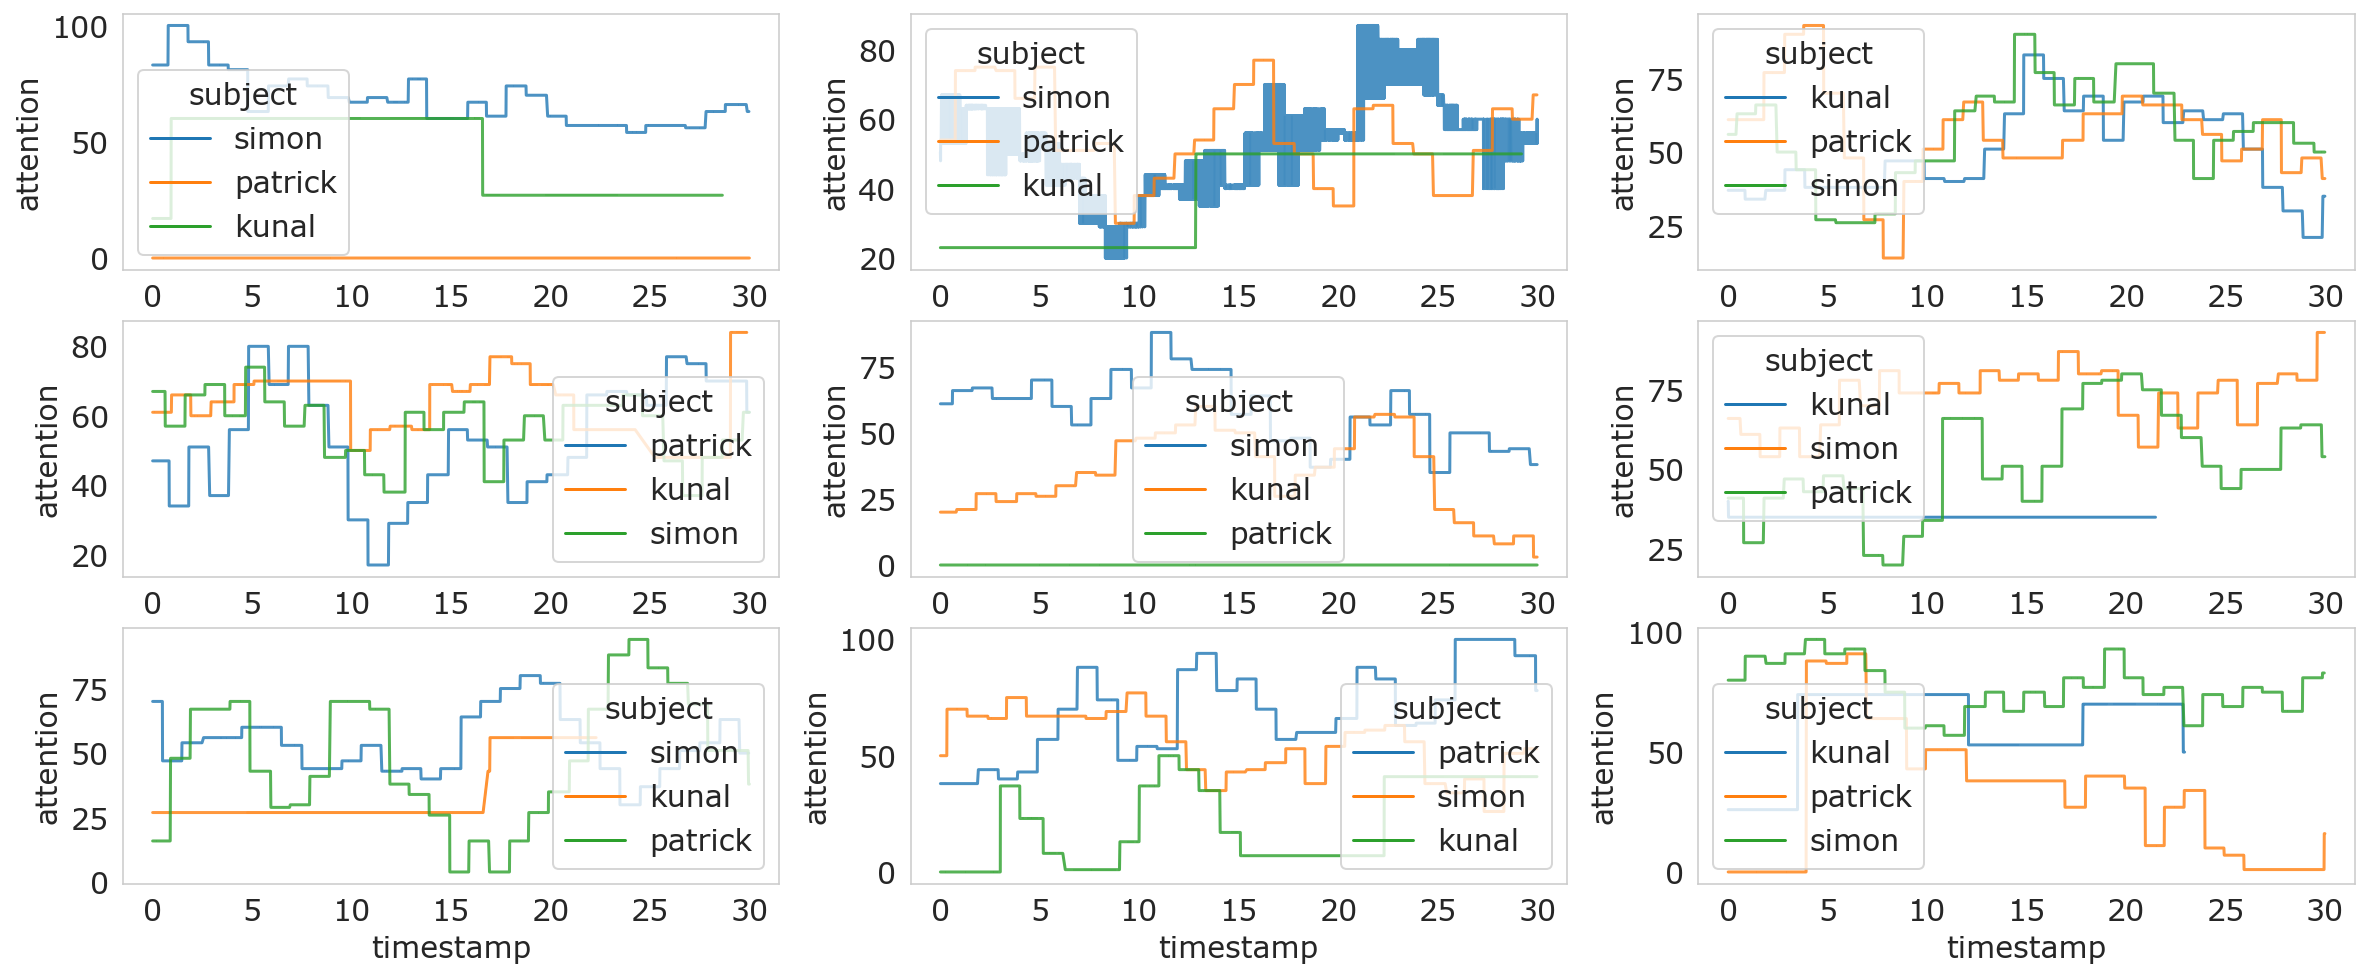

In [417]:
fig, axes = plt.subplots(nrows=3, ncols=3)
sameSongList = {}

for s in songIndex:
    l = selectTrials(song=s)
    if len(l) > 2:
        sameSongList.update({s: l})
    
i = 1
for s in sameSongList:
    plt.subplot(3,3,i)
    temp = []
    print("working on", s)
    for f in sameSongList[s]:
        temp.append(eegDataSet[f])
    temp = pandas.concat(temp)
    seaborn.lineplot(data=temp, hue="subject", x="timestamp", y="attention", alpha=0.8)
    i+=1


working on patrick
['h_patrick_1_who_r_u.csv', 'h_patrick_1_raid.csv', 'h_patrick_1_redbone.csv', 'c_patrick_1_hungarian_dance_11.csv', 'c_patrick_2_dvorak_symphony_9_p_4.csv', 'h_patrick_1_power.csv', 'h_patrick_1_neighbors.csv', 'c_patrick_1_chopen_nocturne.csv', 'h_patrick_1_windy_ladies.csv', 'h_patrick_1_jesus_forgive_me_i_am_a_thot.csv', 'h_patrick_1_say_the_name.csv']
[      subject    genre     song  timestamp  raw_value  attention    id
0     patrick  hip_hop  who_r_u   0.000000         10          0     0
1     patrick  hip_hop  who_r_u   0.009135       -153          0     1
2     patrick  hip_hop  who_r_u   0.017087        -41          0     2
3     patrick  hip_hop  who_r_u   0.022819        -19          0     3
4     patrick  hip_hop  who_r_u   0.032849         26          0     4
...       ...      ...      ...        ...        ...        ...   ...
3461  patrick  hip_hop  who_r_u  29.934604         43          0  3461
3462  patrick  hip_hop  who_r_u  29.934604         43

working on simon
['h_simon_1_say_the_name.csv', 'c_simon_1_bach_vivace.csv', 'h_simon_1_power.csv', 'h_simon_1_ju$t.csv', 'c_simon_1_scottish_fantasy.csv', 'h_simon_1_king_kunta.csv', 'c_simon_1_schubert_quarter_12.csv', 'h_simon_1_self_care.csv', 'c_simon_1_at_last.csv', 'h_simon_1_livin_it_up.csv', 'h_simon_1_windy_ladies.csv', 'c_simon_1_lied_ohne_worte.csv', 'h_simon_1_them_changes.csv', 'c_simon_1_jupiter_jollity.csv', 'h_simon_1_sugar.csv', 'c_simon_1_hungarian_dance_1.csv', 'h_simon_1_crushin_yeeeeaah.csv', 'c_simon_1_slow_seasons_summer.csv', 'h_simon_1_raid.csv', 'h_simon_1_breathe_and_stop.csv', 'c_simon_1_dvorak_symphony_9_p_4.csv', 'c_simon_1_rachmaninov_concerto_2.csv', 'h_simon_1_express_yourself.csv', 'h_simon_1_who_r_u.csv', 'c_simon_1_dvorak_american_quartet.csv', 'c_simon_1_brahms_cello_sonata_no1.csv', 'h_simon_1_jesus_forgive_me_i_am_a_thot.csv', 'h_simon_1_redbone.csv', 'h_simon_1_practice.csv', 'c_simon_1_hungarian_dance_11.csv', 'c_simon_1_deep_river.csv', 'h_sim

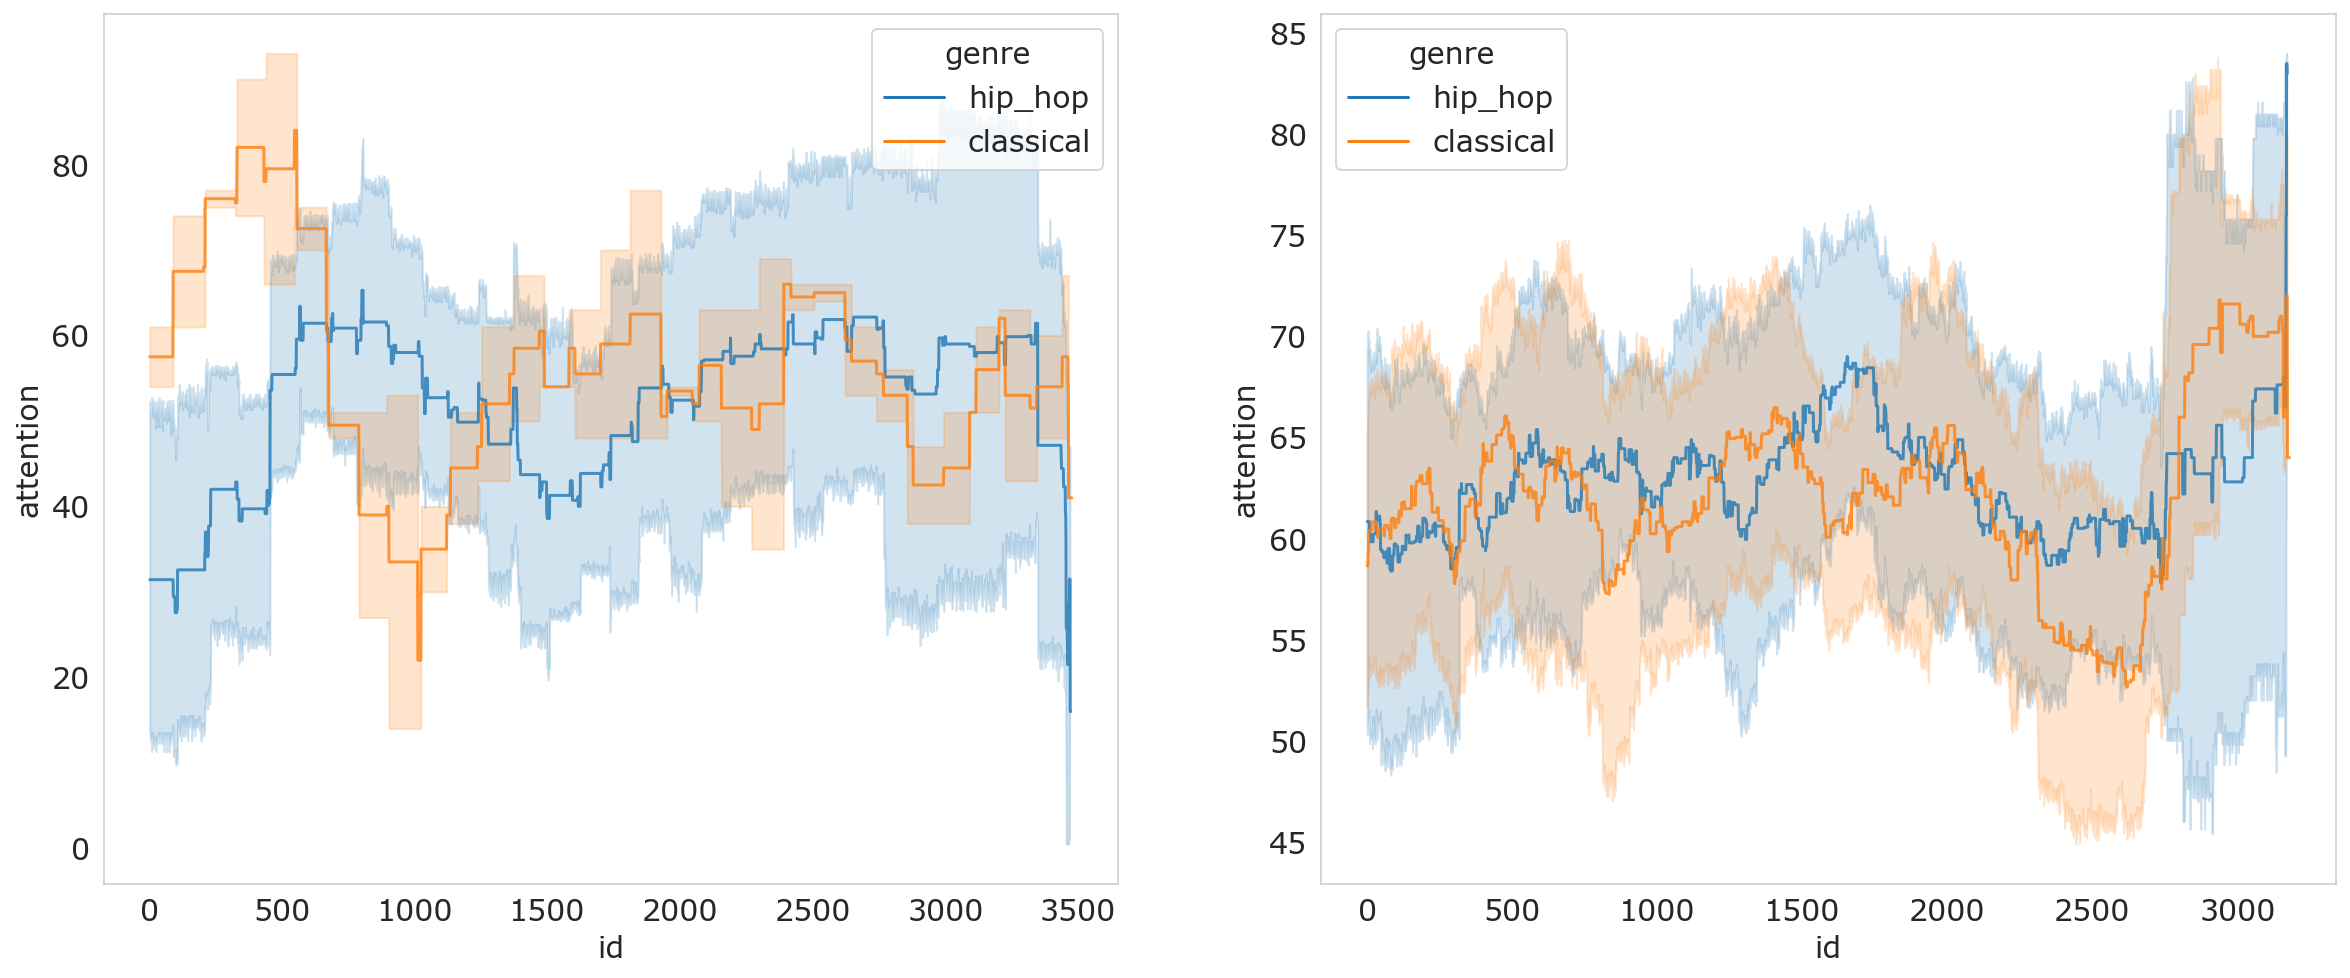

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)
i=0
for s in ["patrick", "simon"]:
    print("working on", s)
    classicalList = selectTrials(subject=s)
    print(classicalList)
    bigData=glom(classicalList)
    i+=1
    plt.subplot(1,2,i)
    seaborn.lineplot(data=bigData, hue="genre", x="id", y="attention", alpha=0.8)
    
    